<a href="https://colab.research.google.com/github/GitMishka/movie/blob/main/movies2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

ratings_df = pd.read_csv('/content/drive/MyDrive/Project1/ratings.csv')
movies_df = pd.read_csv('/content/drive/MyDrive/Project1/movies.csv')




In [3]:
from sklearn.linear_model import LinearRegression

merged_df = pd.merge(ratings_df, movies_df, on='movieId')

avg_ratings_df = merged_df.groupby('title')['rating'].mean().reset_index()

X = avg_ratings_df.index.values.reshape(-1, 1)
y = avg_ratings_df['rating'].values.reshape(-1, 1)
model = LinearRegression().fit(X, y)

print('Slope:', model.coef_[0][0])
print('Intercept:', model.intercept_[0])


Slope: 7.865427977509884e-08
Intercept: 3.0690794692608767


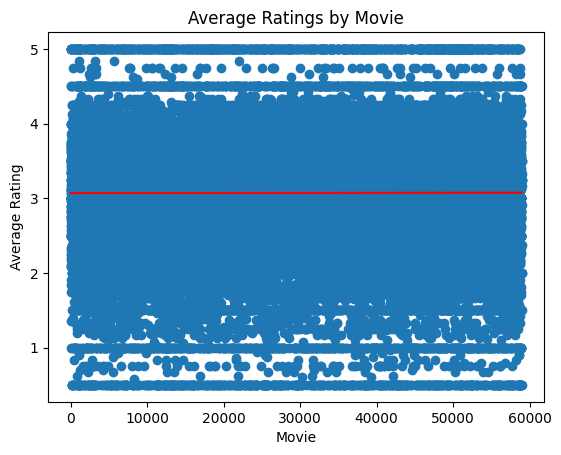

In [4]:
import matplotlib.pyplot as plt

plt.scatter(avg_ratings_df.index, avg_ratings_df['rating'])

plt.plot(X, model.predict(X), color='red')

# Add axis labels and a title
plt.xlabel('Movie')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Movie')

plt.show()


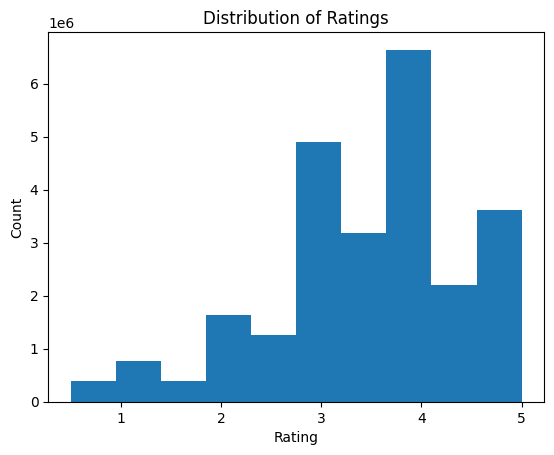

In [5]:

plt.hist(ratings_df['rating'], bins=10)


plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')

plt.show()


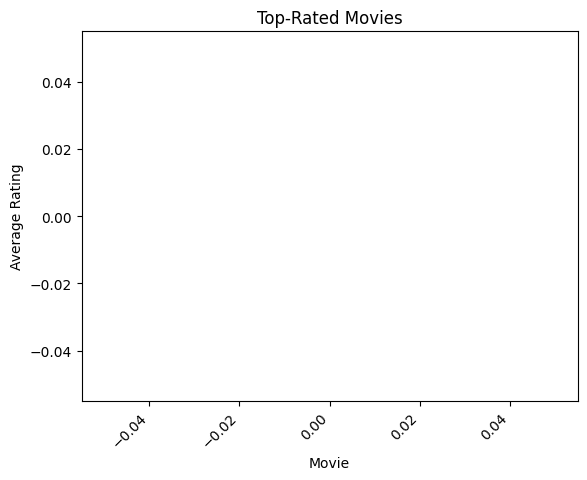

In [6]:

movie_ratings = ratings_df.groupby('movieId')['rating'].mean()


movie_num_ratings = ratings_df.groupby('movieId')['rating'].count()

movie_stats_df = pd.DataFrame({'title': movies_df['title'], 
                               'avg_rating': movie_ratings, 
                               'num_ratings': movie_num_ratings})


top_movies_df = movie_stats_df.sort_values('avg_rating', ascending=False).head(10)


plt.bar(top_movies_df['title'], top_movies_df['avg_rating'])

# Add axis labels and a title
plt.xlabel('Movie')
plt.ylabel('Average Rating')
plt.title('Top-Rated Movies')

plt.xticks(rotation=45, ha='right')

plt.show()


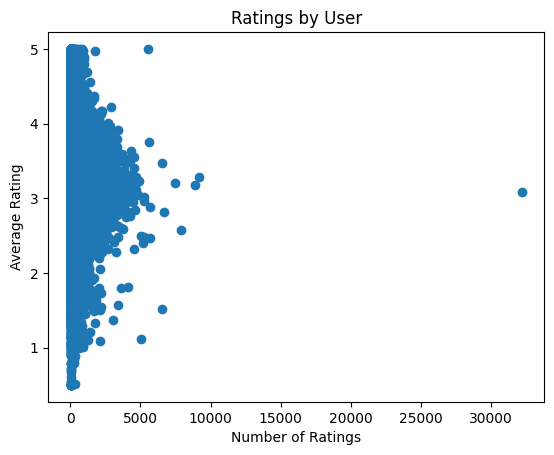

In [7]:

user_num_ratings = ratings_df.groupby('userId')['rating'].count()

user_avg_rating = ratings_df.groupby('userId')['rating'].mean()


plt.scatter(user_num_ratings, user_avg_rating)


plt.xlabel('Number of Ratings')
plt.ylabel('Average Rating')
plt.title('Ratings by User')


plt.show()


In [ ]:
merged_df = pd.merge(ratings_df, movies_df, on='movieId')
merged_df['genre_list'] = merged_df['genres'].str.split('|')
exploded_df = merged_df.explode('genre_list')
genre_ratings_df = exploded_df.groupby('genre_list')['rating'].mean().reset_index()
plt.bar(genre_ratings_df['genre_list'], genre_ratings_df['rating'])
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Ratings by Genre')
plt.xticks(rotation=45, ha='right')
plt.show()

